# INTELIGENCIA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Serie histórica¡

In [15]:

# Generar serie sintética anual desde 1947 hasta 2025 con shocks en eventos clave
years = np.arange(1947, 2026)
base_growth = 100 * (1.02) ** (years - 1947)
series = base_growth.copy()

# Definir shocks en años específicos
shock_years = {
    1973: -20,   # Crisis del petróleo
    1982: -30,   # Recesión Volcker
    1998: -15,   # Crisis rusa
    2000: -10,   # Burbuja .com
    2008: -25,   # Lehman Brothers
    2020: -35    # Pandemia COVID-19
}

for year, drop in shock_years.items():
    idx = year - 1947
    series[idx:] += drop

# Crear DataFrame de la serie
df_series = pd.DataFrame({
    'Año': years,
    'Índice Económico': series
})


### Crisis date

In [21]:
# Datos de crisis para otra tabla
crisis_data = pd.DataFrame([
    {'Crisis': 'Crisis del petróleo', 'Año': 1973, 'Descripción': 'Choque petrolero OPEP'},
    {'Crisis': 'Volcker Recesión', 'Año': 1982, 'Descripción': 'Política monetaria dura'},
    {'Crisis': 'Crisis rusa', 'Año': 1998, 'Descripción': 'Default de deuda rusa'},
    {'Crisis': 'Burbuja .com', 'Año': 2000, 'Descripción': 'Estallido de empresas tecnológicas'},
    {'Crisis': 'Lehman Brothers', 'Año': 2008, 'Descripción': 'Quiebra financiera global'},
    {'Crisis': 'Pandemia COVID-19', 'Año': 2020, 'Descripción': 'Confinamientos mundiales'}
])
crisis_data.sort_values(by='Año', ascending=False, inplace=True)
crisis_data

,Crisis,Año,Descripción
5,Pandemia COVID-19,2020,Confinamientos mundiales
4,Lehman Brothers,2008,Quiebra financiera global
3,Burbuja .com,2000,Estallido de empresas tecnológicas
2,Crisis rusa,1998,Default de deuda rusa
1,Volcker Recesión,1982,Política monetaria dura
0,Crisis del petróleo,1973,Choque petrolero OPEP


### Series

Index(['Año', 'Índice Económico'], dtype='object')


<Axes: title={'center': 'Índice Económico Anual (1947-2025)'}, xlabel='Año'>

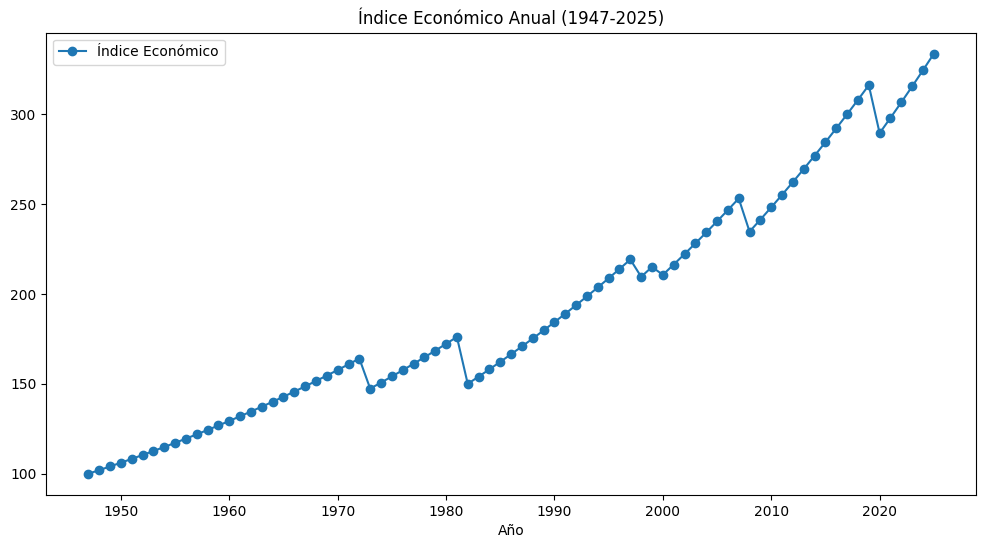

In [14]:
print(df_series.columns)# Graficar la serie temporal
#print(df_series.sum)
df_series.plot(x='Año', y='Índice Económico', marker='o', title='Índice Económico Anual (1947-2025)', figsize=(12, 6))

### EconomicTimeline

In [23]:
# Definir clase OOP para gestionar y visualizar la serie con shocks
class EconomicTimeline:
    def __init__(self, df_series, crises, narrative):
        self.df = df_series.set_index('Año')
        self.crises = crises
        self.narrative = narrative
        
    def plot_timeline(self):
        fig, ax = plt.subplots()
        ax.plot(self.df.index, self.df['Índice Económico'], label='Índice Económico')
        # Añadir líneas de shocks
        for _, row in self.crises.iterrows():
            ax.axvline(row['Año'], linestyle='--')
            ax.text(row['Año'], 
                    self.df.loc[row['Año'], 'Índice Económico'] + 10,
                    row['Crisis'], rotation=90, va='bottom', fontsize=8)
        ax.set_xlabel('Año')
        ax.set_ylabel('Índice Económico')
        ax.set_title('Evolución Económica con Eventos de Choque')
        plt.tight_layout()
        plt.show()
        
    def show_crises_table(self):
        print("Tabla de Crisis Económicas", self.crises)


### Narrativa

In [24]:
# Narrativa hardcodeada en varios actos
narrative = {
    'Acto I': "Reconversión industrial y auge demográfico tras WWII.",
    'Acto II': "Choque petrolero y stagflation de los 70s.",
    'Acto III': "Política monetaria de Volcker y desinflación.",
    'Acto IV': "Estallido de la burbuja .com y crisis rusa.",
    'Acto V': "Crisis financiera 2008 y pandemia COVID-19."
}
narrative

{'Acto I': 'Reconversión industrial y auge demográfico tras WWII.',
 'Acto II': 'Choque petrolero y stagflation de los 70s.',
 'Acto III': 'Política monetaria de Volcker y desinflación.',
 'Acto IV': 'Estallido de la burbuja .com y crisis rusa.',
 'Acto V': 'Crisis financiera 2008 y pandemia COVID-19.'}

## Timeline

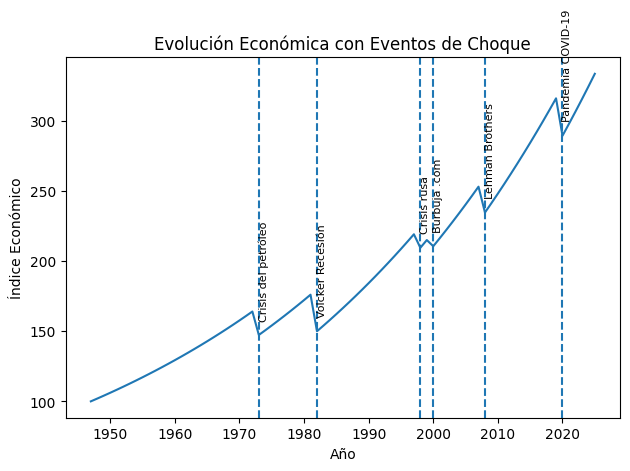

Tabla de Crisis Económicas                 Crisis   Año                         Descripción
5    Pandemia COVID-19  2020            Confinamientos mundiales
4      Lehman Brothers  2008           Quiebra financiera global
3         Burbuja .com  2000  Estallido de empresas tecnológicas
2          Crisis rusa  1998               Default de deuda rusa
1     Volcker Recesión  1982             Política monetaria dura
0  Crisis del petróleo  1973               Choque petrolero OPEP


In [25]:
# Instanciar y visualizar
timeline = EconomicTimeline(df_series, crisis_data, narrative)
timeline.plot_timeline()
timeline.show_crises_table()

# 2

### PRECIOS

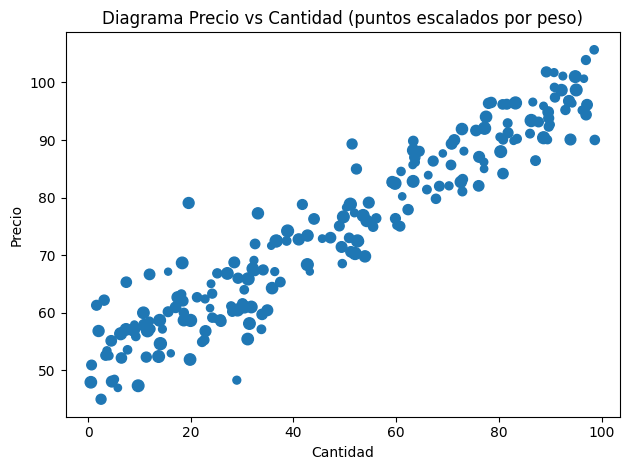

C:\Users\diego.dinatale\AppData\Local\Temp\ipykernel_32332\2736333786.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_copy.groupby('bin').apply(
C:\Users\diego.dinatale\AppData\Local\Temp\ipykernel_32332\2736333786.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_copy.groupby('bin').apply(


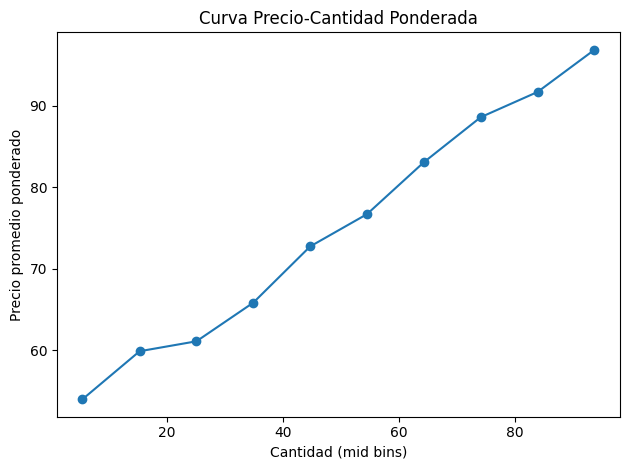

Datos Precio vs Cantidad con Pesos      Cantidad     Precio      Peso
0   37.454012  65.326882  0.924222
1   95.071431  98.696984  1.406354
2   73.199394  88.065059  0.611197
3   59.865848  76.361167  0.992625
4   15.601864  67.129805  0.511354
5   15.599452  60.168891  0.968661
6    5.808361  46.947663  0.556303
7   86.617615  96.591575  0.618818
8   60.111501  75.182342  0.617526
9   70.807258  89.339052  1.149210
10   2.058449  56.822203  1.246045
11  96.990985  94.392081  1.083369
12  83.244264  96.439013  1.462173
13  21.233911  62.680860  0.874871
14  18.182497  63.201549  0.785712
15  18.340451  68.654190  1.368599
16  30.424224  63.985172  0.723596
17  52.475643  72.469141  1.463223
18  43.194502  67.149679  0.512154
19  29.122914  60.482406  1.469879


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Generar dataset sintético con ponderaciones
np.random.seed(42)
n = 200
Q = np.random.uniform(0, 100, n)  # Cantidad
P = 50 + 0.5 * Q + np.random.normal(0, 5, n)  # Precio con algo de ruido
weights = np.random.uniform(0.5, 1.5, n)  # Pesos de cada observación

df = pd.DataFrame({
    'Cantidad': Q,
    'Precio': P,
    'Peso': weights
})

# 2. Definir clase OOP para análisis microeconómico ponderado
class PriceQuantityAnalyzer:
    def __init__(self, dataframe, quantity_col, price_col, weight_col):
        self.df = dataframe
        self.q_col = quantity_col
        self.p_col = price_col
        self.w_col = weight_col
        
    def plot_scatter_weighted(self):
        fig, ax = plt.subplots()
        sizes = self.df[self.w_col] * 50  # Escalar pesos para tamaños de punto
        ax.scatter(self.df[self.q_col], self.df[self.p_col], s=sizes)
        ax.set_xlabel('Cantidad')
        ax.set_ylabel('Precio')
        ax.set_title('Diagrama Precio vs Cantidad (puntos escalados por peso)')
        plt.tight_layout()
        plt.show()
        
    def plot_weighted_curve(self, bins=10):
        # Agrupar en bins de cantidad y calcular promedio ponderado de precio
        df_copy = self.df.copy()
        df_copy['bin'] = pd.cut(df_copy[self.q_col], bins=bins)
        grouped = df_copy.groupby('bin').apply(
            lambda x: np.average(x[self.p_col], weights=x[self.w_col])
        )
        # Usar punto medio de cada bin para eje X
        x_vals = [interval.mid for interval in grouped.index]
        y_vals = grouped.values
        
        fig, ax = plt.subplots()
        ax.plot(x_vals, y_vals, marker='o')
        ax.set_xlabel('Cantidad (mid bins)')
        ax.set_ylabel('Precio promedio ponderado')
        ax.set_title('Curva Precio-Cantidad Ponderada')
        plt.tight_layout()
        plt.show()

# 3. Instanciar y visualizar
analyzer = PriceQuantityAnalyzer(df, 'Cantidad', 'Precio', 'Peso')
analyzer.plot_scatter_weighted()
analyzer.plot_weighted_curve()

# 4. Mostrar tabla de datos
print("Datos Precio vs Cantidad con Pesos", df.head(20))
